In [51]:
# for inline plots in jupyter
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [32]:
from scipy.stats import beta
infest_beta = beta.rvs(4, 60, size=10000)

C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Beta Infestation Distribution')]

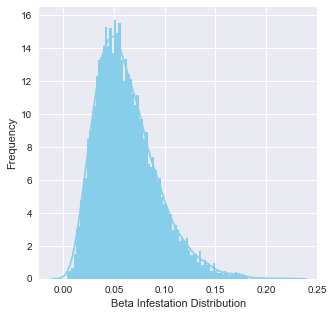

In [33]:
ax = sns.distplot(infest_beta,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta Infestation Distribution', ylabel='Frequency')

In [37]:
# Choose infestation rate for shipment from beta distribution
infest_rate = beta.rvs(1, 40, size=1)
print("Infestation rate:", round(infest_rate[0],4))

Infestation rate: 0.0094


In [38]:
num_stem = np.random.randint(1, high=1000000, size=1) #QUANTITY

# Calculate number of pests in shipment based on infestation rate.
num_pest = int(num_stem * infest_rate)
print("Num stems: ", int(num_stem))
print("Num pests:", num_pest)

Num stems:  681692
Num pests: 6395


In [39]:
# Infest stems using uniform distribution
infest_stem_unif = np.random.randint(1, high = num_stem, size = num_pest)

[560774 232133 212268 ..., 150051  97232 225230]


C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Uniform Infestation Distribution')]

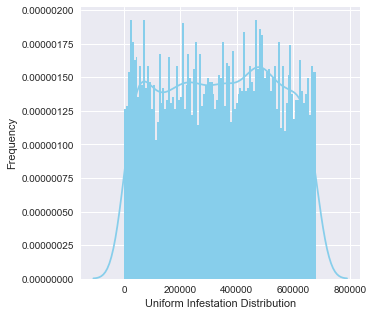

In [40]:
ax = sns.distplot(infest_stem_unif,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Infestation Distribution', ylabel='Frequency')

In [56]:
from scipy.stats import gamma

# Infest stems using gamma distribution to create cluster of pests.
infest_clust = gamma.rvs(4, scale=20, size=num_pest) #rvs(a, loc=0, scale=1, size=1, random_state=None)
infest_clust = [round(x) for x in infest_clust]

# Insert infested cluster of stems into shipment at random position
start_clust = np.random.randint(1, high = num_stem - max(infest_clust), size = 1)
infest_stem_clust = infest_clust + start_clust

print("Size of cluster:", int(max(infest_stem_clust) - min(infest_stem_clust)), "stems")

Size of cluster: 338 stems


C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Clustered Infestation Distribution')]

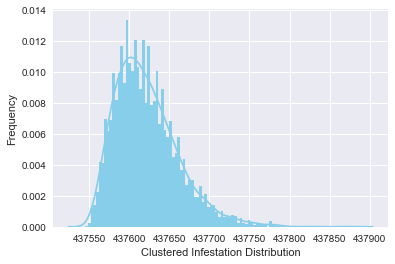

In [57]:
ax = sns.distplot(infest_stem_clust,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Clustered Infestation Distribution', ylabel='Frequency')

In [53]:
num_boxes = math.ceil(num_stem / 200)
print(num_boxes)

3409
